In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

In [61]:
import seaborn as sns

1.Consider the wine dataset

In [62]:
wine=pd.read_csv('D:\datas\winequality.csv')

In [63]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [64]:
wine.shape

(1599, 12)

2.Check if any nulls are present in the dataset

In [65]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


3.Perform Outlier Analysis for features and justify reasons if outliers are detected in features.

In [66]:
wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


residual sugar, free sulfur dioxide, total sulfur dioxide has some outliers. lets confirm it using the box plot

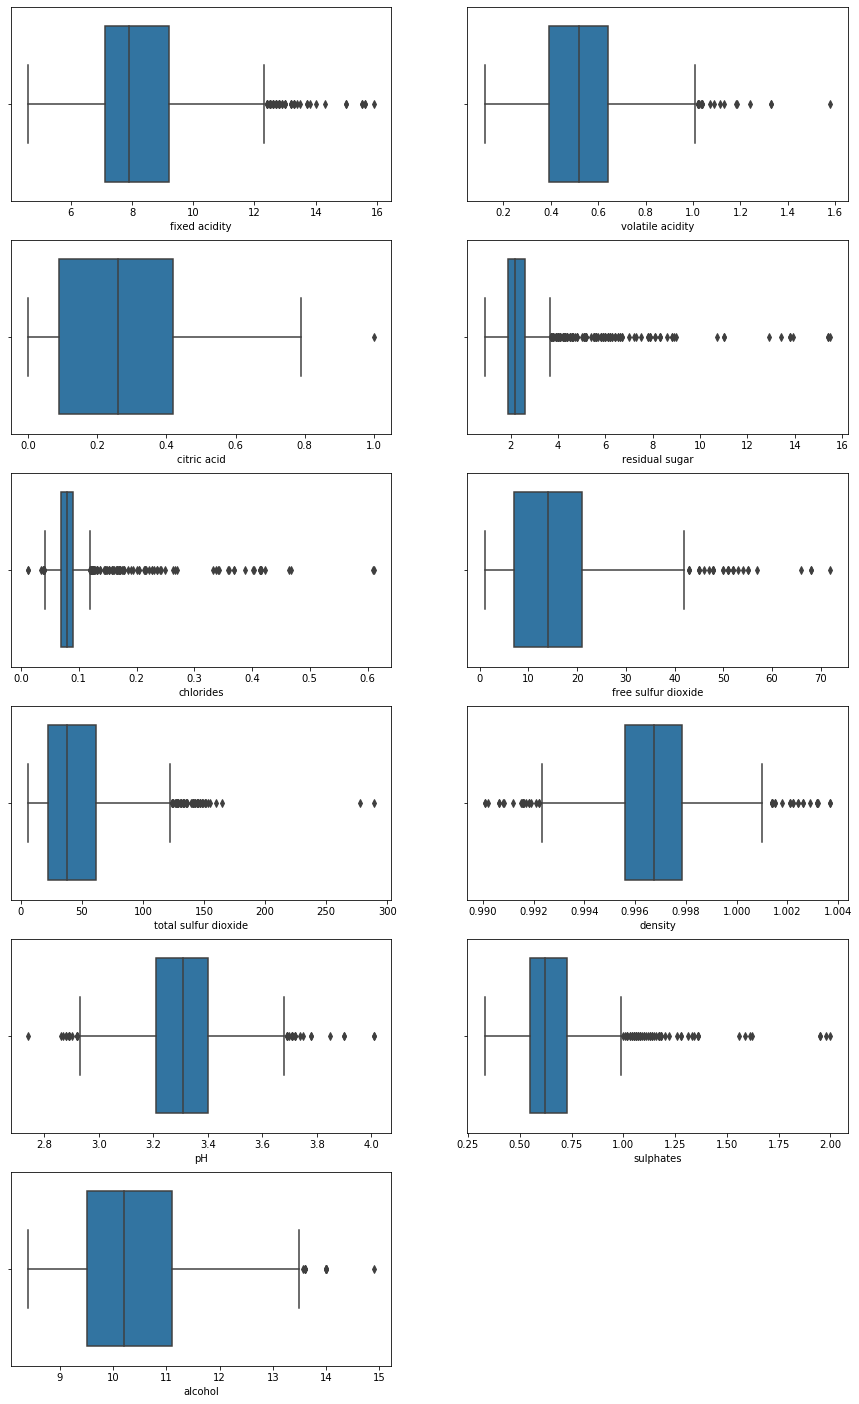

In [67]:
plt.figure(figsize=(15,25))
n=1
num_cols=[]
for col in wine.select_dtypes('float64'):
    plt.subplot(6,2,n)
    sns.boxplot(wine[col])
    #plt.title(col)
    num_cols.append(col)
    n=n+1
plt.show()

    

We can see taht chlorides, free sulpherdioxide and total sulfer di-odixe show outliers the rest of the variable we can see as a business outliers lets start treating the outliers of these 3 variables

In [68]:
num_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [81]:
(wine['chlorides'].values>0.5).sum()

2

In [82]:
wine_df=wine[wine['chlorides']<0.5]

In [83]:
wine_df.shape

(1597, 12)

In [84]:
(wine['sulphates'].values>1.75).sum()

4

In [85]:
wine_df=wine[wine['sulphates']<1.75]

In [86]:
wine_df.shape

(1595, 12)

4.Perform Univariate Analysis of numerical features

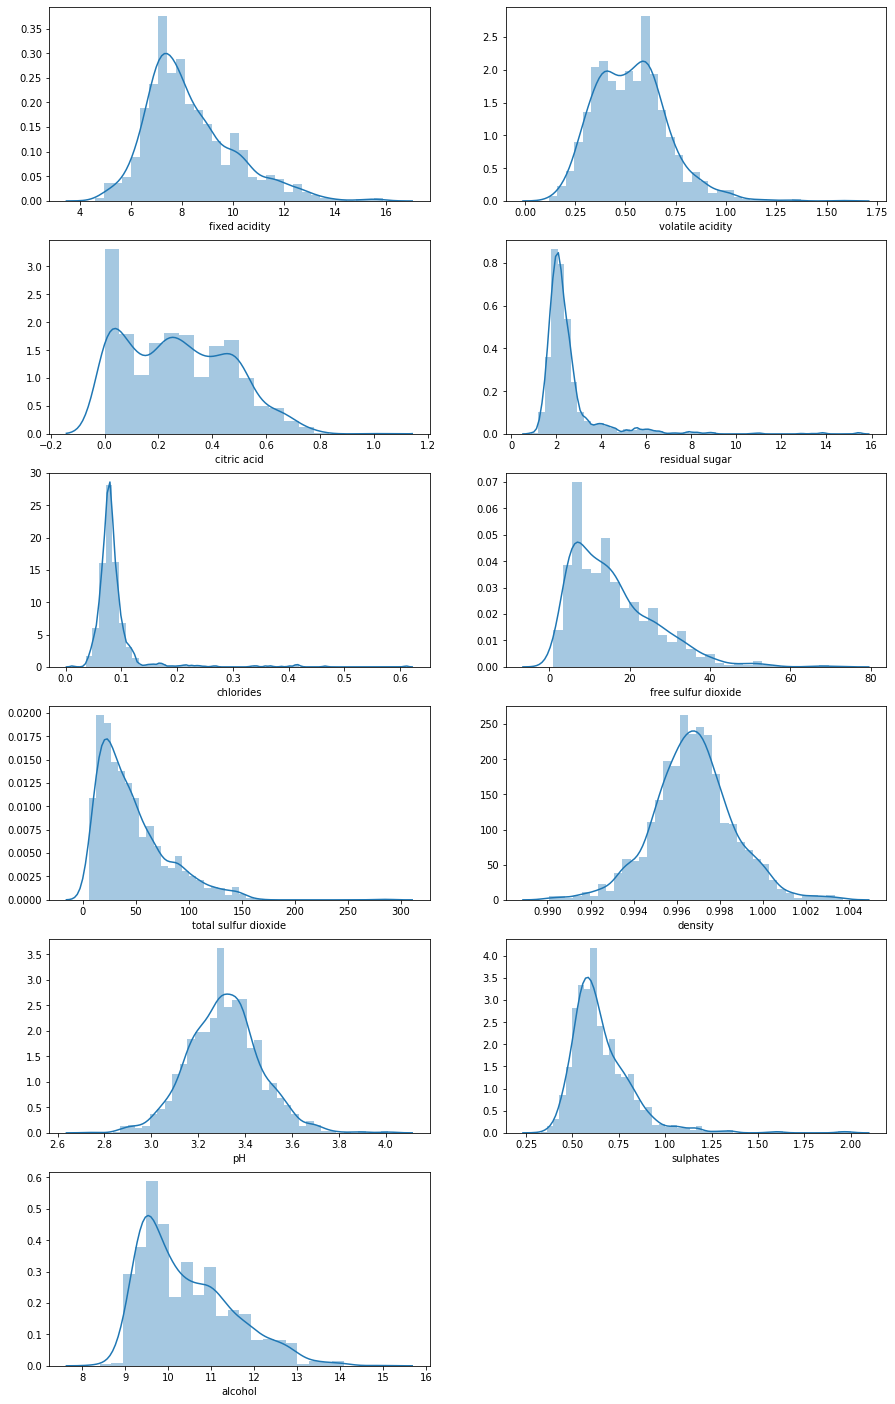

In [87]:
plt.figure(figsize=(15,25))
n=1
for col in wine.select_dtypes('float64'):
    plt.subplot(6,2,n)
    sns.distplot(wine[col])
    #plt.title(col)
    n=n+1
plt.show()
    

In [88]:
size=[wine.quality[wine['quality']==3].count(),wine.quality[wine['quality']==4].count(),wine.quality[wine['quality']==5].count(),wine.quality[wine['quality']==6].count(),wine.quality[wine['quality']==7].count(),wine.quality[wine['quality']==8].count()]

In [89]:
labels=['quality-3', 'quality-4', 'quality-5', 'quality-6', 'quality-7', 'quality-8']

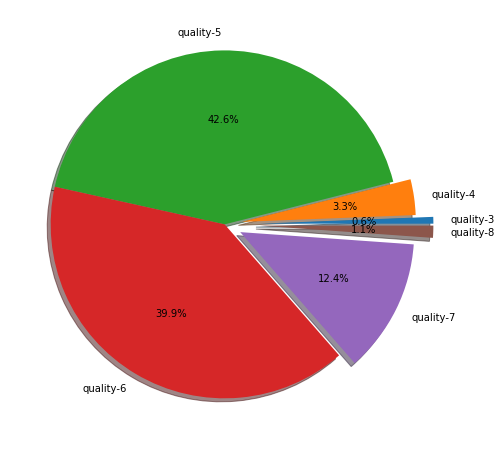

In [90]:
plt.figure(figsize=(8,8))
plt.pie(size, labels=labels, explode=(0.2,0.1,0,0,0.1,0.2), shadow=True, autopct='%1.1f%%')
plt.show()

5. Perform bi-variate analysis of 2-3 features

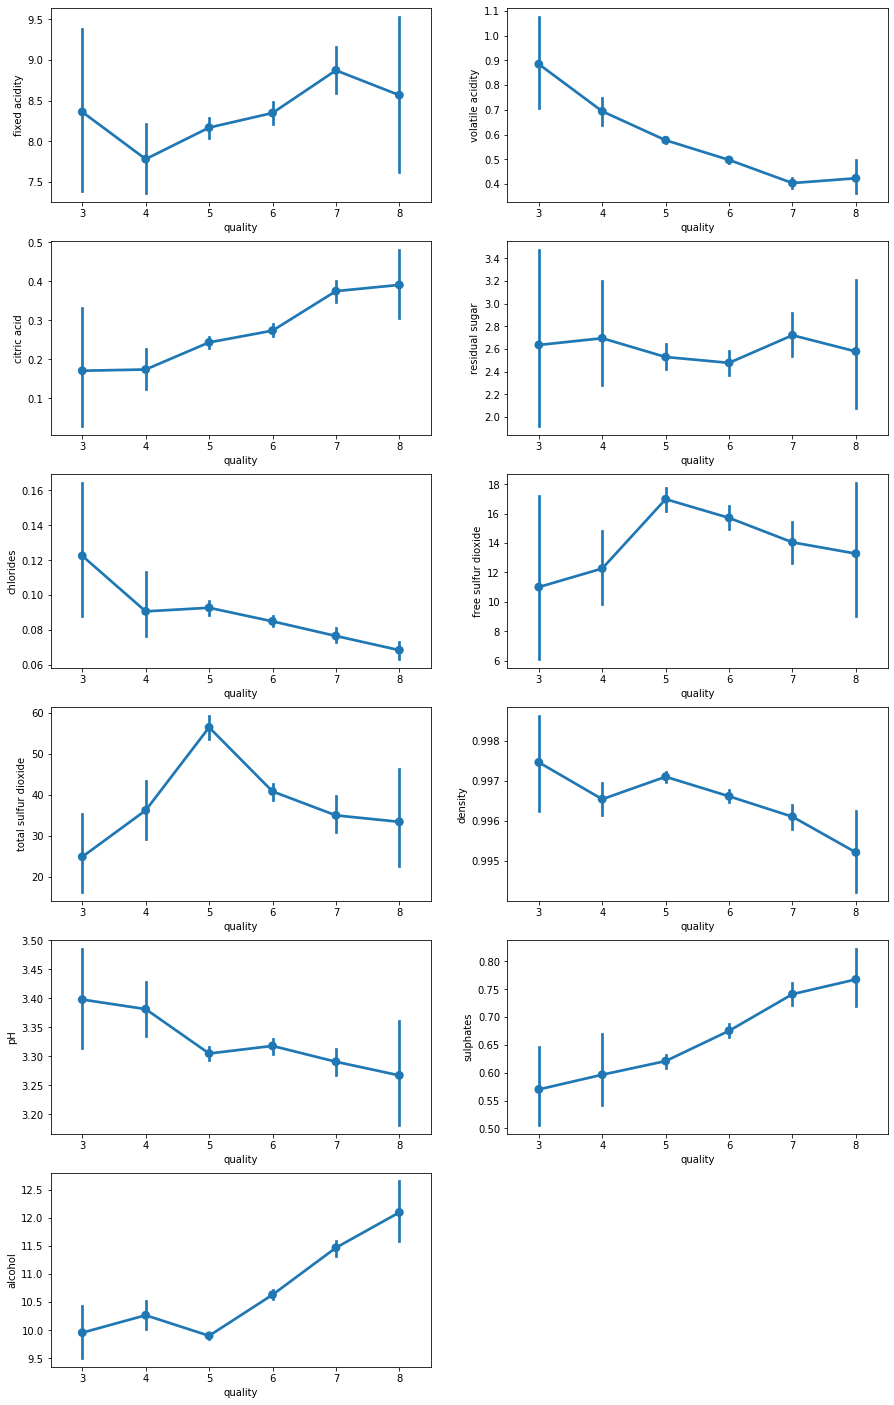

In [91]:
plt.figure(figsize=(15,25))
n=1
for col in wine.select_dtypes('float64'):
    plt.subplot(6,2,n)
    sns.pointplot(x='quality', y=col, data=wine)
    #plt.title(col)
    n=n+1
plt.show()

6.Normalize features using MinMaxScaler

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler=MinMaxScaler()

In [95]:
nums=wine_df.loc[:,num_cols]
numeric=scaler.fit_transform(nums)
x=pd.DataFrame(numeric, columns=num_cols)

In [96]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.000000,0.068493,0.106845,0.140845,0.098940,0.567548,0.565217,0.178295,0.153846
1,0.283186,0.520548,0.000000,0.116438,0.143573,0.338028,0.215548,0.494126,0.295652,0.271318,0.215385
2,0.283186,0.438356,0.050633,0.095890,0.133556,0.197183,0.169611,0.508811,0.347826,0.248062,0.215385
3,0.584071,0.109589,0.708861,0.068493,0.105175,0.225352,0.190813,0.582232,0.260870,0.193798,0.215385
4,0.247788,0.397260,0.000000,0.068493,0.106845,0.140845,0.098940,0.567548,0.565217,0.178295,0.153846


In [97]:
x.shape

(1595, 11)

In [98]:
wine_df.shape

(1595, 12)

7.In K-Means, plot the elbow method showing the minimum k to be choosen.

In [99]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [100]:
distortion=[]
k_range=range(1,15)
for k in k_range:
    kmean_model=KMeans(n_clusters=k)
    kmean_model.fit(x)
    dist=sum(np.min(cdist(x,kmean_model.cluster_centers_,'euclidean'),axis=1))/x.shape[0]
    distortion.append(dist)

In [101]:
print(k_range)
print(distortion)

range(1, 15)
[0.44846419627922157, 0.3757156653060458, 0.3504771912555245, 0.3296195246149859, 0.3148292843412096, 0.30841343674670024, 0.2987291287117607, 0.292385071429778, 0.2870148244189484, 0.2829196904290601, 0.2778576773181079, 0.2738215600024061, 0.2689318368092876, 0.2655337961934231]


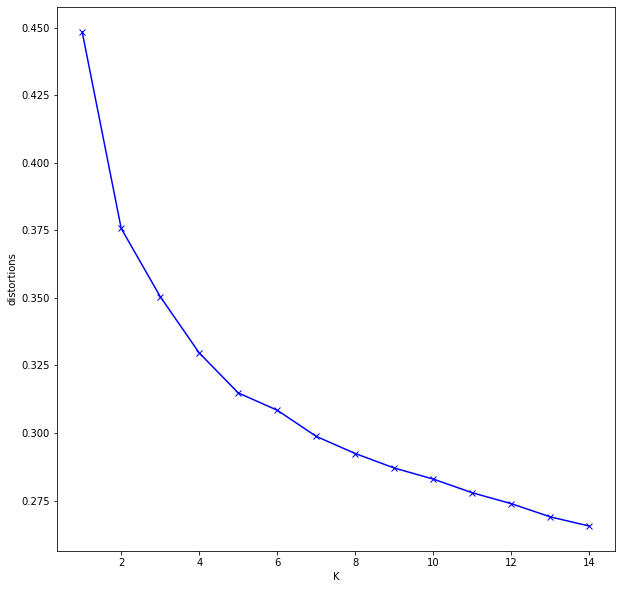

In [102]:
plt.figure(figsize=(10,10))
plt.plot(k_range,distortion, 'bx-')
plt.xlabel('K')
plt.ylabel('distortions')
plt.show()

from the plot above we can choose K=5, as there is no high distrortion when K> 5.

8. Also, use Silhouette analysis to prove minimum k needed to build clusters

In [103]:
from sklearn.metrics import silhouette_score

In [108]:
no_clus=[]
sill_score=[]
k_range=range(2,15)
for k in k_range:
    kmean_model=KMeans(n_clusters=k)
    kmean_model.fit(x)
    y=kmean_model.fit_predict(x)
    sill=round(silhouette_score(x,y),4)
    no_clus.append(k)
    sill_score.append(sill)

In [109]:
silhoutte=pd.DataFrame({'cluster #':no_clus, 'Sihouette_Score': sill_score})
silhoutte.sort_values(by=['Sihouette_Score'], ascending=False)

,cluster #,Sihouette_Score
0,2,0.2724
1,3,0.2034
4,6,0.2007
2,4,0.1980
3,5,0.1932
7,9,0.1792
6,8,0.1778
5,7,0.1744
9,11,0.1626
12,14,0.1567


as per the above table, 2 clusters show maximum score, so well group the data into three groups

9.On figuring out clusters , implement K-Means Clustering

In [111]:
model=KMeans(n_clusters=2).fit(x)
clust_labels=model.predict(x)
centers=model.cluster_centers_

In [112]:
print(clust_labels)
print(centers)

[0 0 0 ... 0 0 1]
[[0.24464469 0.33564951 0.17103548 0.10278015 0.11664469 0.22201233
  0.15049136 0.45298192 0.44732226 0.21112386 0.28519038]
 [0.44776358 0.20028306 0.58329038 0.12565342 0.13763512 0.19134111
  0.13092326 0.54207945 0.31713555 0.3090486  0.34845496]]


In [113]:
kmeans=pd.DataFrame(clust_labels, columns=['kmeans'])
kmeans.shape

(1595, 1)

In [114]:
kmeans['kmeans'].value_counts()

0    932
1    663
Name: kmeans, dtype: int64

In [115]:
kmeans.head()

,kmeans
0,0
1,0
2,0
3,1
4,0


In [122]:
wine_df.shape

(1595, 12)

In [123]:
wine_df=pd.concat([wine_df,kmeans], axis=1)

In [125]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kmeans
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0,1.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0,NaN
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0,NaN
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0,NaN
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6.0,NaN


9.Using Agglomerative Clustering, plot dendrograms and find out the number of clusters being formed

Text(0.5, 1.0, 'Dendogram')

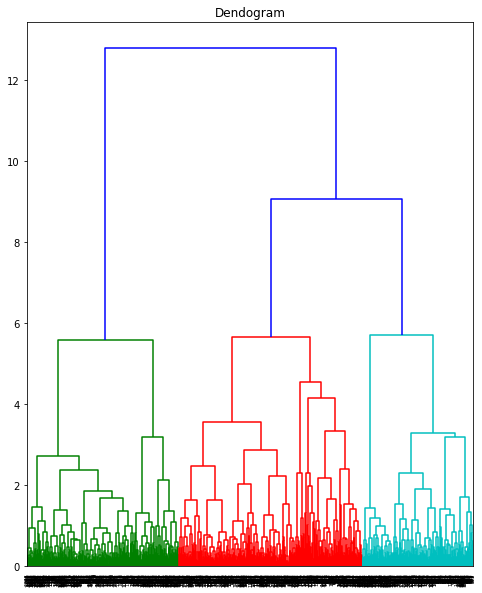

In [126]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8,10))
dend=shc.dendrogram(shc.linkage(x, method='ward'))
plt.title('Dendogram')


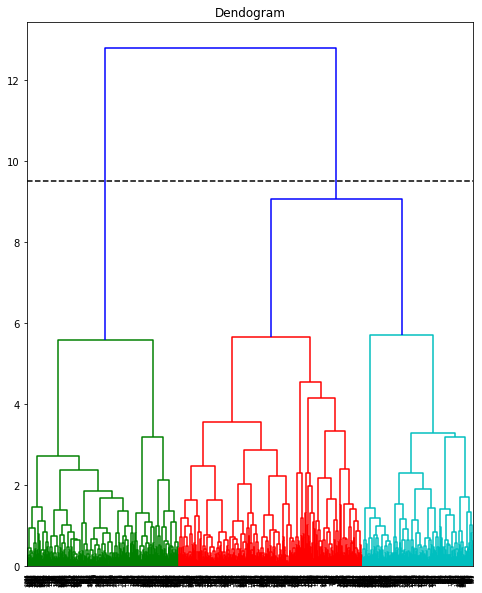

In [127]:
plt.figure(figsize=(8,10))
dend=shc.dendrogram(shc.linkage(x, method='ward'))
plt.title('Dendogram')
plt.axhline(y=9.5, color='k', linestyle='--')
plt.show()

We observe two clusters as the line cuts the dendrogram at 2 points

11. Plot the clusters based on Agglomerative Clustering

In [129]:
from sklearn.cluster import AgglomerativeClustering

In [134]:
agglo=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cus_labels=agglo.fit_predict(x)

In [135]:
agglo_df=pd.DataFrame(cus_labels, columns=['clusters'])

In [137]:
wine_quality=pd.concat([x,agglo_df], axis=1)

<Figure size 720x720 with 0 Axes>

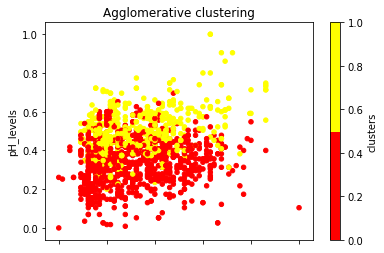

In [148]:
plt.figure(figsize=(10,10))
wine_quality.plot(kind='scatter',x='alcohol',y='pH', c='clusters', cmap=plt.cm.get_cmap('autumn',2))
plt.title('Agglomerative clustering')
plt.xlabel('Alcohol')
plt.ylabel('pH_levels')
#plt.colorbar(scatter)
plt.show()